In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head(3)
train.tail(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


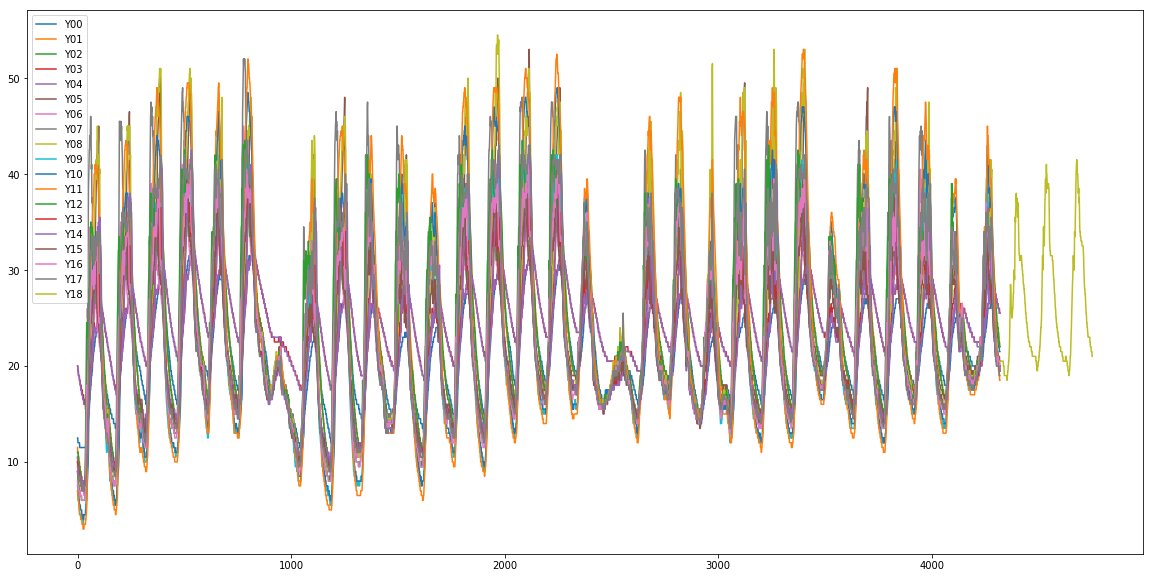

In [4]:
train.loc[:,"Y00":"Y18"].plot(figsize=(20,10))

In [6]:
mean_temp = train.loc[:, "Y00":"Y17"].mean(axis=1)
mean_temp

0       10.666667
1       10.444444
2       10.166667
3       10.000000
4        9.833333
5        9.750000
6        9.444444
7        9.416667
8        9.305556
9        9.138889
10       9.000000
11       8.944444
12       8.888889
13       8.777778
14       8.750000
15       8.694444
16       8.611111
17       8.472222
18       8.361111
19       8.361111
20       8.250000
21       8.138889
22       8.083333
23       8.027778
24       8.000000
25       7.972222
26       7.916667
27       7.888889
28       7.888889
29       7.861111
          ...    
4722          NaN
4723          NaN
4724          NaN
4725          NaN
4726          NaN
4727          NaN
4728          NaN
4729          NaN
4730          NaN
4731          NaN
4732          NaN
4733          NaN
4734          NaN
4735          NaN
4736          NaN
4737          NaN
4738          NaN
4739          NaN
4740          NaN
4741          NaN
4742          NaN
4743          NaN
4744          NaN
4745          NaN
4746      

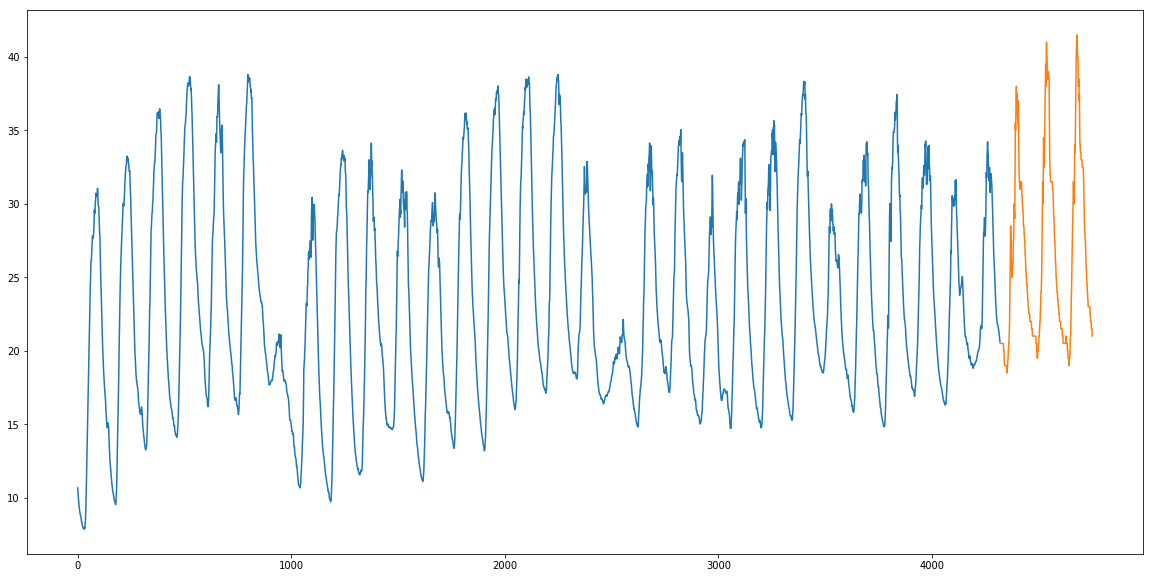

In [7]:
plt.figure(figsize=(20,10))
plt.plot(mean_temp)
plt.plot(train["Y18"])

In [8]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [10]:
t = train["Y18"].isna() 
t

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
4722    False
4723    False
4724    False
4725    False
4726    False
4727    False
4728    False
4729    False
4730    False
4731    False
4732    False
4733    False
4734    False
4735    False
4736    False
4737    False
4738    False
4739    False
4740    False
4741    False
4742    False
4743    False
4744    False
4745    False
4746    False
4747    False
4748    False
4749    False
4750    False
4751    False
Name: Y18, Length: 4752, dtype: bool

In [11]:
null_index = t[t==True].index
null_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319],
           dtype='int64', length=4320)

In [12]:
train.loc[null_index, "Y18"] = train.loc[null_index, "Y00":"Y17"].mean(axis=1)

In [13]:
train

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,10.666667
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,10.444444
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,10.166667
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,10.000000
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,9.833333
5,5,9.1,988.9,1.3,0.7,0.0,1009.1,989.6,12.0,1010.0,...,6.0,7.0,6.0,7.5,9.0,9.0,8.5,7.0,8.5,9.750000
6,6,9.1,988.8,2.4,1.9,0.0,1009.1,989.6,12.0,1010.1,...,5.5,6.5,5.5,7.5,9.0,8.5,8.0,7.0,8.0,9.444444
7,7,8.9,988.9,1.0,1.2,0.0,1009.2,989.7,11.9,1010.1,...,5.5,6.0,5.5,7.5,9.0,8.5,8.0,7.0,8.0,9.416667
8,8,9.0,988.9,1.5,0.1,0.0,1009.2,989.6,11.9,1010.0,...,5.0,6.0,5.0,7.0,9.0,8.5,8.0,7.0,8.0,9.305556
9,9,8.8,988.9,1.4,0.4,0.0,1009.4,989.6,11.8,1010.1,...,4.5,5.5,5.0,7.0,8.5,8.5,8.0,7.0,8.0,9.138889


In [14]:
X_train = train.loc[:, "X00":"X39"]
y_train = train["Y18"]

In [15]:
lgb_train = lgb.Dataset(X_train, label=y_train)

lgb_param = {
    "objective":"regression",
    "metrics":"mae",
    "learning_rate":0.01
}

print("cv start")
cv_result = lgb.cv(
    lgb_param,
    lgb_train,
    num_boost_round=99999,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval=10 
)

print("train start")
lgb_model = lgb.train(
    lgb_param,
    lgb_train,
    num_boost_round=len(cv_result["l1-mean"])
)

cv start
[10]	cv_agg's l1: 5.5744 + 0.0884371
[20]	cv_agg's l1: 5.05846 + 0.0811182
[30]	cv_agg's l1: 4.59062 + 0.0750247
[40]	cv_agg's l1: 4.16833 + 0.0685854
[50]	cv_agg's l1: 3.78729 + 0.0634223
[60]	cv_agg's l1: 3.44296 + 0.0588523
[70]	cv_agg's l1: 3.13267 + 0.0545763
[80]	cv_agg's l1: 2.85426 + 0.0506641
[90]	cv_agg's l1: 2.60479 + 0.0469134
[100]	cv_agg's l1: 2.38098 + 0.0432834
[110]	cv_agg's l1: 2.18015 + 0.040085
[120]	cv_agg's l1: 2.00042 + 0.0363647
[130]	cv_agg's l1: 1.8388 + 0.0321137
[140]	cv_agg's l1: 1.69417 + 0.0291896
[150]	cv_agg's l1: 1.56433 + 0.0267547
[160]	cv_agg's l1: 1.44808 + 0.0241908
[170]	cv_agg's l1: 1.34395 + 0.0217233
[180]	cv_agg's l1: 1.25116 + 0.0196608
[190]	cv_agg's l1: 1.16846 + 0.0186965
[200]	cv_agg's l1: 1.0947 + 0.018013
[210]	cv_agg's l1: 1.02835 + 0.0174697
[220]	cv_agg's l1: 0.969134 + 0.0171961
[230]	cv_agg's l1: 0.917045 + 0.016874
[240]	cv_agg's l1: 0.871082 + 0.0170279
[250]	cv_agg's l1: 0.829755 + 0.0170705
[260]	cv_agg's l1: 0.793067

[2030]	cv_agg's l1: 0.378711 + 0.00928154
[2040]	cv_agg's l1: 0.378529 + 0.00922433
[2050]	cv_agg's l1: 0.378323 + 0.00924036
[2060]	cv_agg's l1: 0.378154 + 0.00919048
[2070]	cv_agg's l1: 0.377946 + 0.00919758
[2080]	cv_agg's l1: 0.377757 + 0.00916383
[2090]	cv_agg's l1: 0.377566 + 0.00918995
[2100]	cv_agg's l1: 0.377331 + 0.00918132
[2110]	cv_agg's l1: 0.377133 + 0.0091778
[2120]	cv_agg's l1: 0.376937 + 0.00918234
[2130]	cv_agg's l1: 0.376709 + 0.00918895
[2140]	cv_agg's l1: 0.376525 + 0.00920621
[2150]	cv_agg's l1: 0.37634 + 0.0091721
[2160]	cv_agg's l1: 0.376167 + 0.0091621
[2170]	cv_agg's l1: 0.376 + 0.00914568
[2180]	cv_agg's l1: 0.37585 + 0.00919279
[2190]	cv_agg's l1: 0.375686 + 0.0092356
[2200]	cv_agg's l1: 0.375502 + 0.00927287
[2210]	cv_agg's l1: 0.375326 + 0.00928627
[2220]	cv_agg's l1: 0.375112 + 0.00928073
[2230]	cv_agg's l1: 0.374935 + 0.00930552
[2240]	cv_agg's l1: 0.374774 + 0.00931805
[2250]	cv_agg's l1: 0.374629 + 0.00931007
[2260]	cv_agg's l1: 0.374489 + 0.00930122
[

[3990]	cv_agg's l1: 0.360281 + 0.00917655
[4000]	cv_agg's l1: 0.360241 + 0.00917193
[4010]	cv_agg's l1: 0.360185 + 0.00917016
[4020]	cv_agg's l1: 0.360137 + 0.00919251
[4030]	cv_agg's l1: 0.360111 + 0.00919584
[4040]	cv_agg's l1: 0.360091 + 0.00920188
[4050]	cv_agg's l1: 0.360053 + 0.00921196
[4060]	cv_agg's l1: 0.360032 + 0.00921498
[4070]	cv_agg's l1: 0.360002 + 0.00921668
[4080]	cv_agg's l1: 0.359973 + 0.00923091
[4090]	cv_agg's l1: 0.359944 + 0.00923024
[4100]	cv_agg's l1: 0.359915 + 0.00924085
[4110]	cv_agg's l1: 0.359887 + 0.00924496
[4120]	cv_agg's l1: 0.359842 + 0.00925943
[4130]	cv_agg's l1: 0.359817 + 0.00925983
[4140]	cv_agg's l1: 0.35979 + 0.00925608
[4150]	cv_agg's l1: 0.359757 + 0.00925435
[4160]	cv_agg's l1: 0.359717 + 0.00926056
[4170]	cv_agg's l1: 0.359691 + 0.00926298
[4180]	cv_agg's l1: 0.359662 + 0.00927254
[4190]	cv_agg's l1: 0.359623 + 0.00926608
[4200]	cv_agg's l1: 0.359583 + 0.00927389
[4210]	cv_agg's l1: 0.359548 + 0.00927947
[4220]	cv_agg's l1: 0.35953 + 0.009

In [17]:
submission["Y18"] = lgb_model.predict(test.loc[:, "X00":"X39"])
submission.head()

,id,Y18
0,4752,20.299102
1,4753,20.233678
2,4754,20.062699
3,4755,19.858985
4,4756,19.697776


In [18]:
submission.to_csv('data/submission_0404_2.csv', index=False)